In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sc
from scipy import signal
import pandas as pd
import statsmodels.stats.diagnostic as sm
from obspy.signal.detrend import polynomial
import statsmodels

In [21]:
dados = sc.loadmat('series_chl_sst_v2.mat')
chl_P1 = dados['chl_P1'][0:828,:]
chl_P2 = dados['chl_P2']
chl_P3 = dados['chl_P3']
chl_P4 = dados['chl_P4']
sst_P1 = dados['sst_P1'][0:644,:]
sst_P2 = dados['sst_P2']
sst_P3 = dados['sst_P3']
sst_P4 = dados['sst_P4']
plt.style.use('ggplot')


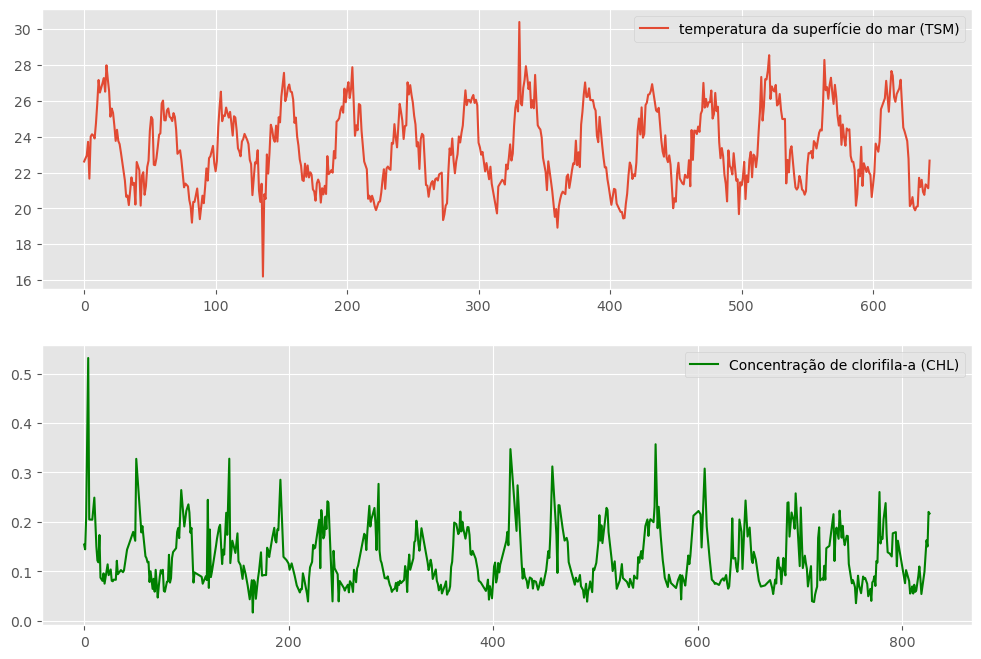

In [22]:
plt.figure(figsize=(12,8))
plt.subplot(211)
plt.plot(sst_P1,label='temperatura da superfície do mar (TSM)')
plt.legend()
plt.subplot(212)
plt.plot(chl_P1,label='Concentração de clorifila-a (CHL)',color='green')
plt.legend()

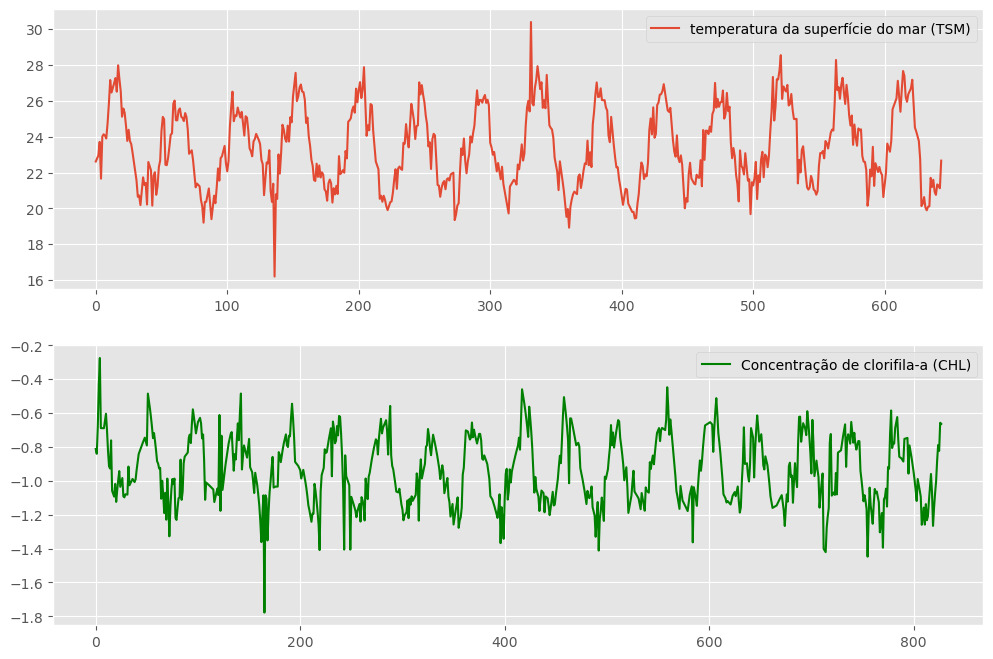

In [23]:
plt.figure(figsize=(12,8))
plt.subplot(211)
plt.plot(sst_P1,label='temperatura da superfície do mar (TSM)')
plt.legend()
plt.subplot(212)
plt.plot(np.log10(chl_P1),label='Concentração de clorifila-a (CHL)',color='green')
plt.legend()

In [24]:
detredssh=statsmodels.tsa.tsatools.detrend(sst_P1, order=3, axis=0)
detredchl=statsmodels.tsa.tsatools.detrend(np.log10(chl_P1), order=3, axis=0)

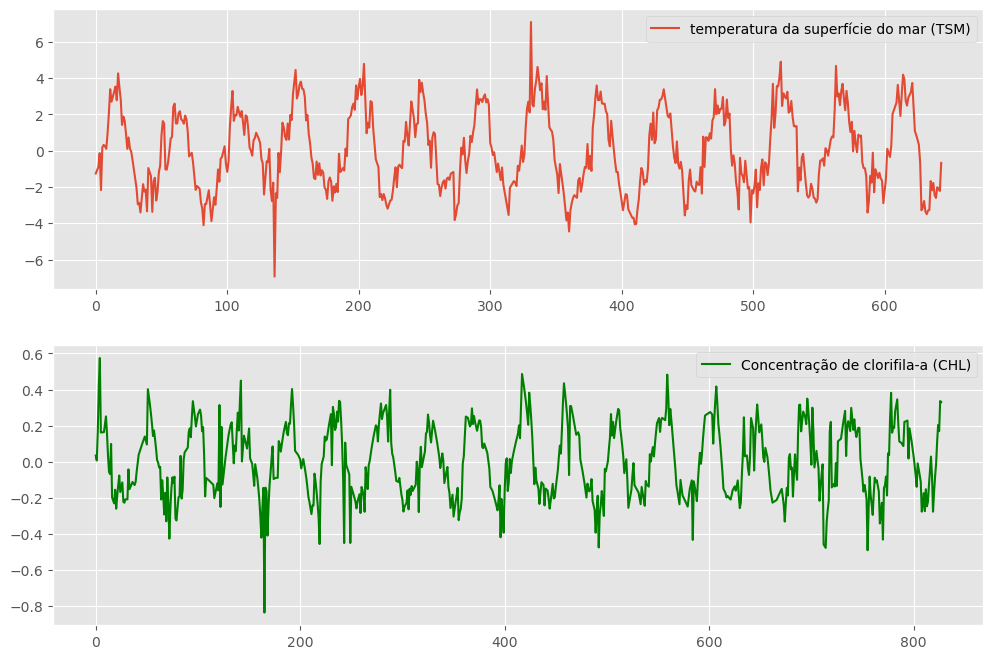

In [25]:
plt.figure(figsize=(12,8))
plt.subplot(211)
plt.plot(detredssh,label='temperatura da superfície do mar (TSM)')
plt.legend()
plt.subplot(212)
plt.plot(detredchl,label='Concentração de clorifila-a (CHL)',color='green')
plt.legend()

In [26]:
def calculate_fourier_coeff(y):
    y = np.array(y)
    N = len(y)
    A = np.zeros(N//2)
    B = np.zeros(N//2)
    T = np.zeros(N//2)
    f = np.zeros(N//2)
    
    for p in range(1, N//2 + 1):
        Alpha = 0
        Beta = 0
        for n in range(N):
            Alpha += (2/N) * (y[n] * np.cos((2 * np.pi * n * p) / N))
            Beta += (2/N) * (y[n] * np.sin((2 * np.pi * n * p) / N))
        A[p-1] = Alpha
        B[p-1] = Beta
        T[p-1] = N / p
        f[p-1] = p / N
    
    Ao = 2 * np.mean(y)
    A = np.insert(A, 0, Ao)
    B = np.insert(B, 0, 0)
    f = np.insert(f, 0, np.nan)
    T = np.insert(T, 0, np.nan)
    C = np.sqrt(A**2 + B**2)
    theta = np.arctan2(B, A)
    theta = np.degrees(theta)
    theta[0] = np.nan
    
    return A, B, C, theta, f, T

def calculate_fourier_series2(A, B, f, N):
    A = np.array(A)
    B = np.array(B)
    f = np.array(f)
    A = A.reshape(-1, 1)
    B = B.reshape(-1, 1)
    Ao = A[0]
    Na = len(A)
    Nb = len(B)
    if Na != Nb:
        raise ValueError('A and B must be the same size')
    y = np.zeros((Na, N))
    i = np.arange(1, N+1)
    for p in range(Na):
        y[p, :] = y[p, :] + A[p] * np.cos(2 * np.pi * f[p] * i) + B[p] * np.sin(2 * np.pi * f[p] * i)
    Y = 0.5 * Ao + np.sum(y, axis=0)
    return y, Y

In [27]:
At, Bt, Ct, thetat, ft, Tt = calculate_fourier_coeff(sst_P1)
Ac, Bc, Cc, thetac, fc, Tc = calculate_fourier_coeff(chl_P1)

In [28]:
x = np.argsort(At)[::-1][:6]
x

array([ 0,  4, 10, 67,  6,  1])

In [29]:
At[x]

array([46.78200206,  0.23004915,  0.20168221,  0.15827286,  0.15221472,
        0.15094963])

In [30]:
x = np.argsort(Bt)[::-1][:6]
x

array([14,  6, 20, 17, 22, 55])

In [31]:
Bt[x]

array([2.22623559, 0.21330429, 0.1962461 , 0.1616022 , 0.16145243,
       0.14340388])

In [32]:
x = np.argsort(Ac)[::-1][:6]
x

array([ 0, 18, 25,  6, 34, 12])

In [33]:
Ac[x]

array([0.25626171, 0.05891033, 0.00597877, 0.00562355, 0.00560137,
       0.00515924])

In [34]:
x = np.argsort(Bc)[::-1][:6]
x

array([18, 36, 30, 46,  2, 49])

In [35]:
Bc[x]

array([0.03443252, 0.01480117, 0.00588837, 0.00580585, 0.0053072 ,
       0.0050731 ])

In [36]:
y,Y = calculate_fourier_series2(At,Bt,ft,N=644)

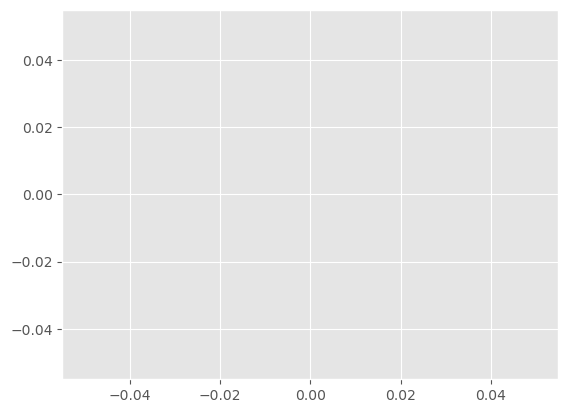

In [37]:
plt.plot(Y)